# Importing modules

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import pickle

In [135]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [136]:
df.shape

(301, 9)

In [137]:
print(df['Fuel_Type'].unique(),'\n',
      df['Seller_Type'].unique(),'\n',
      df['Transmission'].unique(),'\n',
      df['Owner'].unique(),'\n',
      df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG'] 
 ['Dealer' 'Individual'] 
 ['Manual' 'Automatic'] 
 [0 1 3] 
 ['Petrol' 'Diesel' 'CNG']


## checking empty or null values

In [138]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [139]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [140]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [141]:
finalData = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
finalData.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [142]:
finalData['Current_Year']=2021
finalData.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [143]:
finalData['Car_Age']=finalData['Current_Year']-finalData['Year']
finalData.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [144]:
finalData.drop(['Year'],axis=1,inplace=True)

In [145]:
finalData.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [146]:
finalData.drop(['Current_Year'],axis=1,inplace=True)

In [147]:
finalData.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## One hot encoding

In [148]:
finalData = pd.get_dummies(finalData,drop_first=True)

In [149]:
finalData.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [150]:
finalData.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


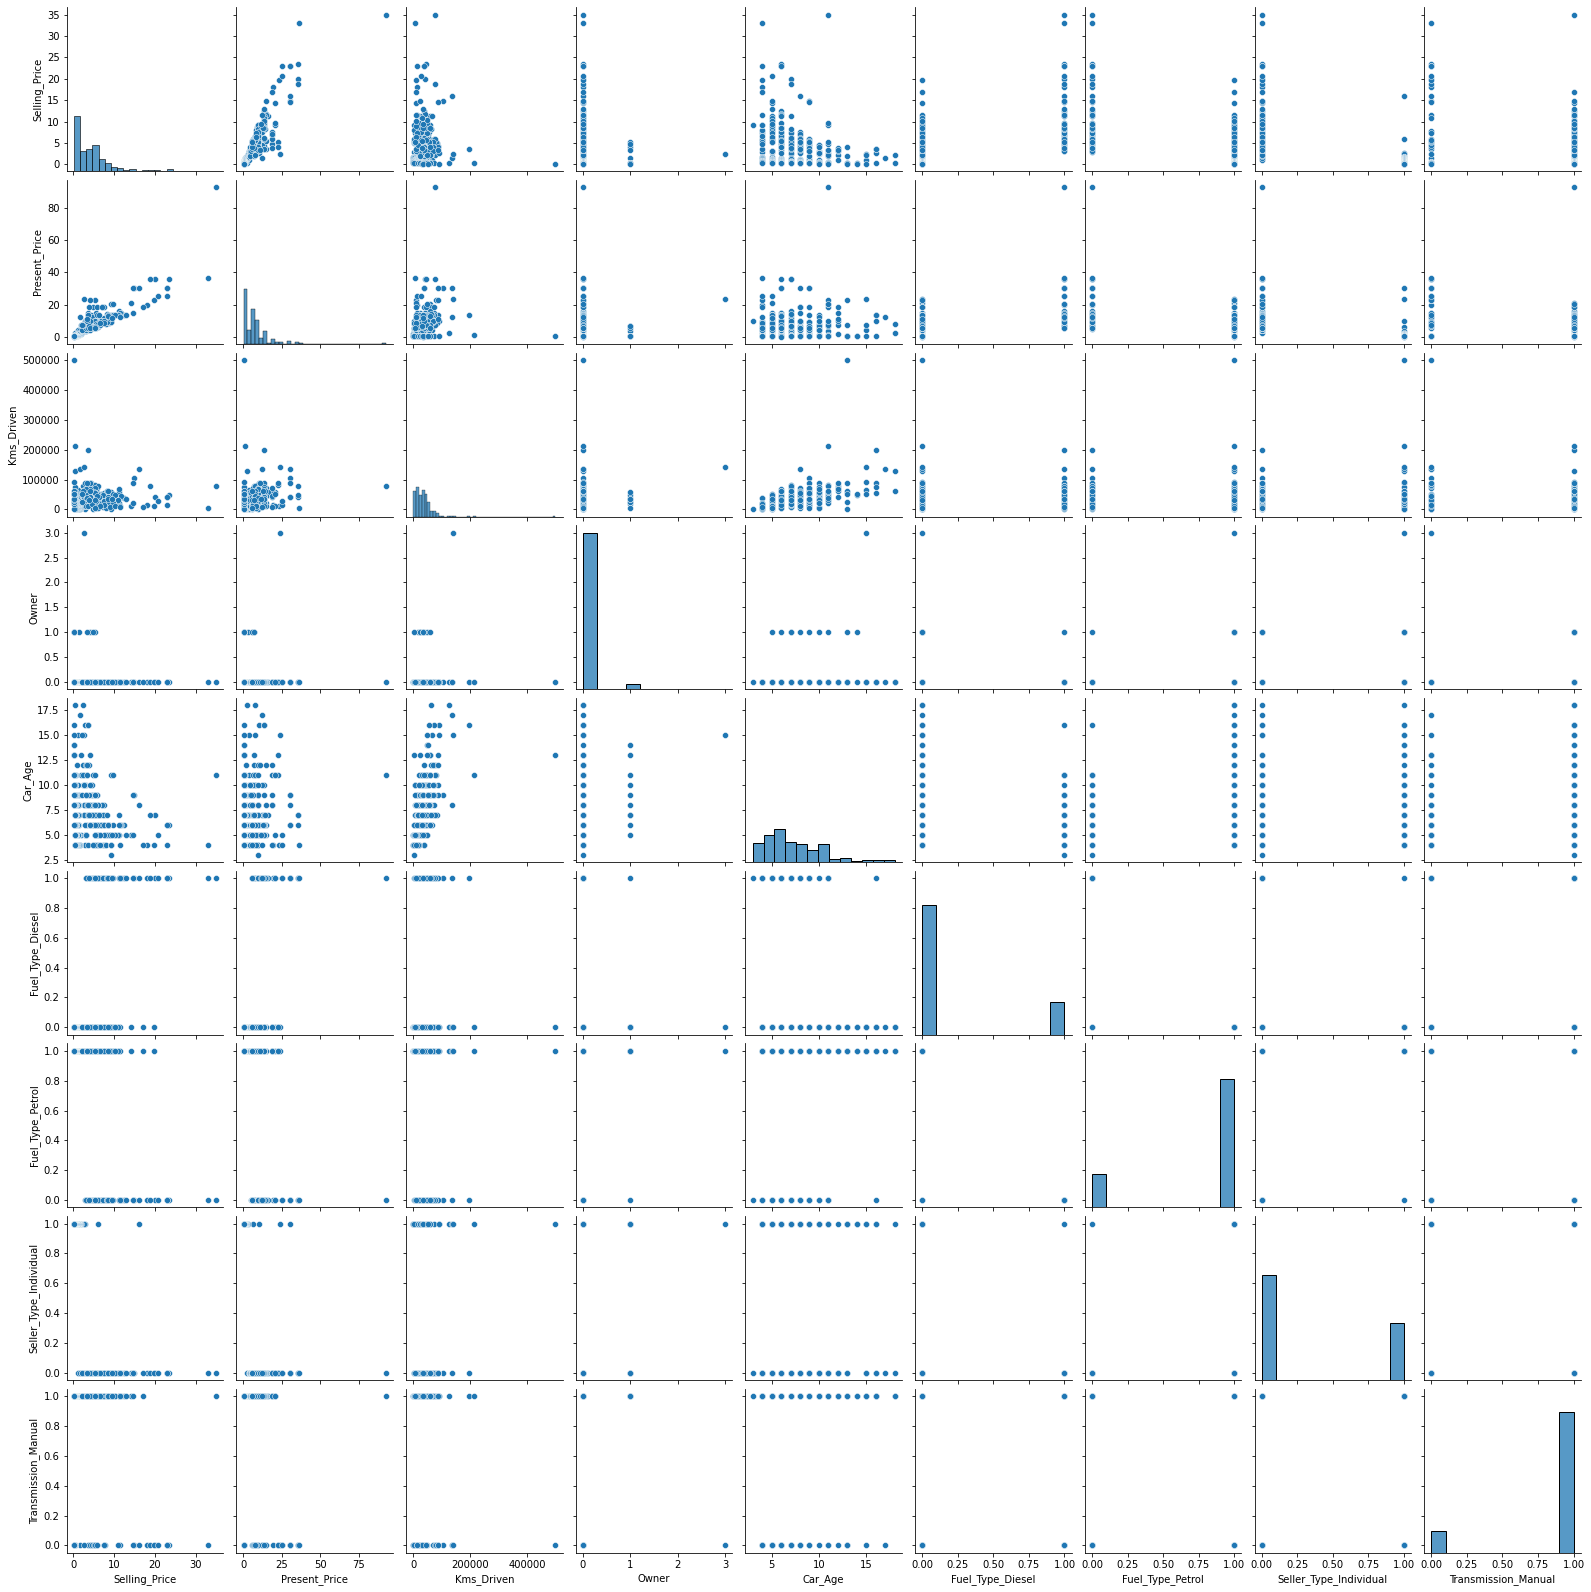

In [108]:
sns.pairplot(finalData)

## Plot heatmap

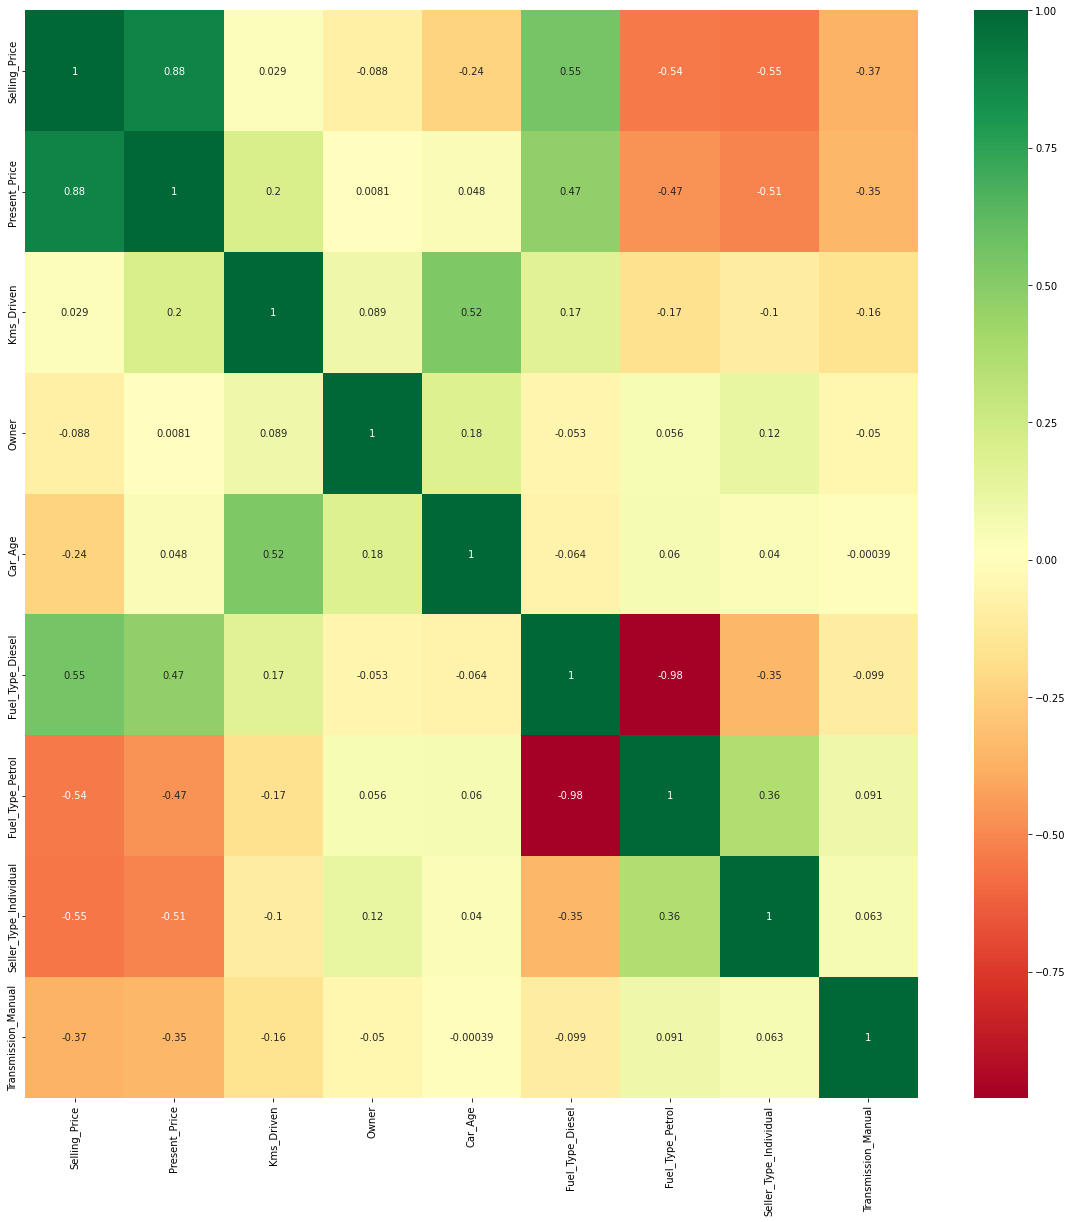

In [109]:
corrMat = finalData.corr()
topCorrFeature = corrMat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(finalData[topCorrFeature].corr(),annot = True,cmap='RdYlGn')

In [110]:
finalData.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Declaring Dependent and Independent var

In [111]:
finalData.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
x = finalData.iloc[:,1:]
y = finalData.iloc[:,0]

In [113]:
x.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [114]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Feature Importance

In [115]:
model = ExtraTreesRegressor()
model.fit(x,y)
model.feature_importances_

array([0.42124418, 0.03975706, 0.00162061, 0.07612784, 0.19790566,
       0.01503323, 0.12513271, 0.12317872])

### Plot graph of feature importances for better visualization 

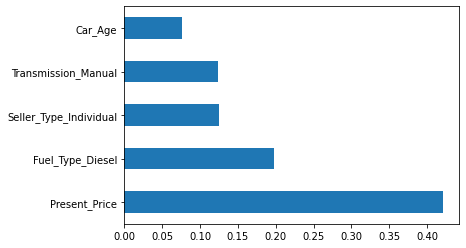

In [116]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [117]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.2)

In [118]:
xTrain.shape

(240, 8)

# Model Selection

## Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
rfRandom = RandomForestRegressor()

### Hyper para miters

In [120]:
n_estimators = [int(X) for X in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

### Randomized Search CV

In [121]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

#### Create the random grid

In [122]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [123]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [124]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rfRandom = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,
                               random_state=42, n_jobs = 1)

In [125]:
rfRandom.fit(xTrain,yTrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [126]:
prediction = rfRandom.predict(xTest)
prediction

array([ 4.89952,  3.89872,  1.07277,  4.38886,  0.63268,  1.27632,
        5.39662,  7.51777, 15.9757 ,  4.87035,  1.09949,  4.90892,
        5.14651,  5.87375,  5.57931,  0.93253,  5.0838 ,  0.58036,
        3.3071 ,  0.54623,  7.12247,  8.77804,  8.53511,  0.57837,
        1.3912 ,  4.611  ,  9.14931,  8.08807,  4.55444,  0.57717,
        0.52047,  3.03509,  4.4776 ,  4.24136,  4.66049,  0.43762,
        2.61927, 20.31682,  6.1931 ,  2.94123,  4.3791 ,  6.59445,
        0.98315,  0.52148,  5.89184,  2.48927,  9.40843,  0.5027 ,
        0.54777,  0.6348 , 13.16669,  0.59206,  1.01248,  2.7245 ,
       11.86657,  0.90944,  7.4878 ,  4.78917,  4.58974, 21.80195,
       11.67146])

C:\Users\Muhammad Nur\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

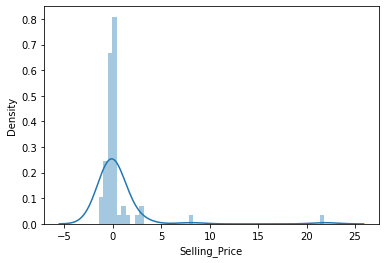

In [127]:
sns.distplot(yTest-prediction)

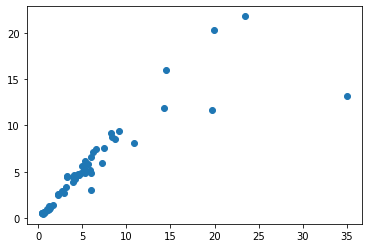

In [128]:
plt.scatter(yTest,prediction)

In [129]:
# open a file, where you ant to store the data
file = open('randomForestRegressionModel.pkl', 'wb')

# dump information to that file
pickle.dump(rfRandom, file)
file.close()

In [130]:
xTest.head(2)

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
238,9.4,60241,0,8,0,1,0,1
259,7.0,36054,0,7,0,1,0,1


In [131]:
rfRandom.predict([[0.32,34000,0,6,0,1,1,1]])[0]

0.28406000000000314

In [151]:
rfRandom.predict([[20.0 ,25000 ,1, 5, 1, 0, 1, 0]])[0]

14.093519999999987

In [133]:
xTest.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')